In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading scraped data into a DataFrame
df = pd.read_csv("FlipScrapedData.csv")
#print(df)

# Data Cleaning
# Removing rows with missing values
df.dropna(subset=["Product Name", "Current Price", "Reviews", "Description"], inplace=True)

# Converting data types
df["Current Price"] = df["Current Price"].str.replace("₹", "").str.replace(",", "").astype(float)
# Cleaning the "Discount %age" column
df["Discount %age"] = df["Discount %age"].str.replace('%', '').str.replace('off', '').str.strip().astype(float)
df["Number Rate & Review"] = df["Number Rate & Review"].str.replace(",", "").str.split(" ").str[0].astype(int)

# Summary Statistics
summary = df.describe()
print(summary)




       Unnamed: 0  Current Price  Discount %age     Reviews  \
count   211.00000     211.000000     211.000000  211.000000   
mean    105.00000   19186.625592      26.080569    4.178673   
std      61.05462   27241.051409      10.129079    0.236180   
min       0.00000     649.000000       2.000000    3.300000   
25%      52.50000    6631.500000      18.000000    4.100000   
50%     105.00000    9499.000000      26.000000    4.200000   
75%     157.50000   14999.000000      34.000000    4.300000   
max     210.00000   99999.000000      46.000000    4.700000   

       Number Rate & Review  
count            211.000000  
mean           34001.308057  
std            42449.224998  
min               53.000000  
25%             3513.500000  
50%            19965.000000  
75%            47871.000000  
max           228134.000000  


Average price =  19186.625592417062
Median Price =  9499.0
Price Range = 99350.0


Row with Minimum Price:
Unnamed: 0                                                            151
Product Name                                                 HOTLINE H310
Current Price                                                       649.0
MRP                                                                ₹1,099
Discount %age                                                         5.0
Reviews                                                               3.9
Number Rate & Review                                                10802
Description             32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...
Name: 151, dtype: object

Row with Maximum Price:
Unnamed: 0                                                              0
Product Name                    SAMSUNG Galaxy Z Flip5 (Lavender, 256 GB)
Current Price                                                     99999.0
MRP                          

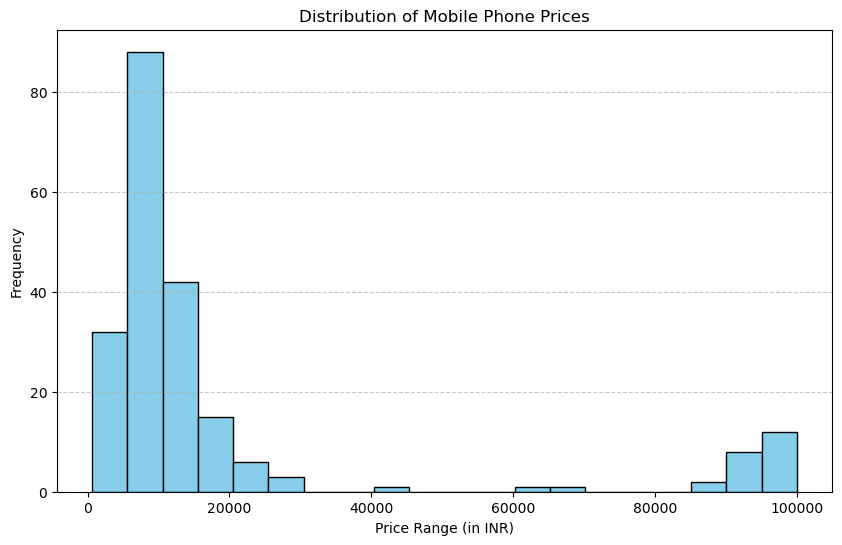

In [2]:
# Price Analysis
average_price = df["Current Price"].mean()
print("Average price = " ,average_price)

median_price = df["Current Price"].median()
print("Median Price = " , median_price)

price_range = df["Current Price"].max() - df["Current Price"].min()
print("Price Range =" , price_range)

print("\n")

# Index of minimum price
min_price_index = df["Current Price"].idxmin()

# Index of maximum price
max_price_index = df["Current Price"].idxmax()

# Rows for minimum and maximum prices
min_price_row = df.loc[min_price_index]
max_price_row = df.loc[max_price_index]

print("Row with Minimum Price:")
print(min_price_row)

print("\nRow with Maximum Price:")
print(max_price_row)

# Histogram to visualize the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Current Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Range (in INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Phone Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("price distribution.png")
plt.show()

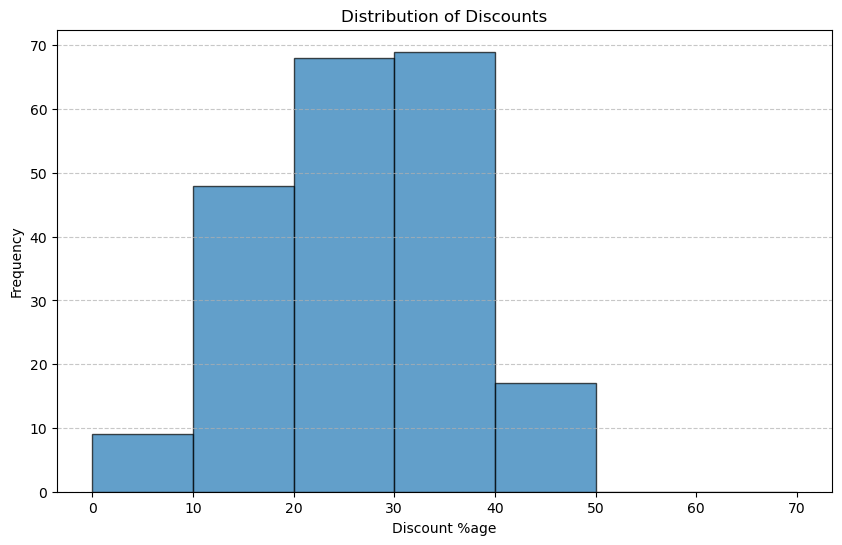

Mobile phone with the highest discount:
Unnamed: 0                                                             94
Product Name                                    POCO M5 (Icy Blue, 64 GB)
Current Price                                                      8499.0
MRP                                                               ₹15,999
Discount %age                                                        46.0
Reviews                                                               4.6
Number Rate & Review                                               200102
Description             4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
Name: 94, dtype: object

Mobile phone with the lowest discount:
Unnamed: 0                                                              0
Product Name                    SAMSUNG Galaxy Z Flip5 (Lavender, 256 GB)
Current Price                                                     99999.0
MRP                                                             ₹1,02,999
Discount

In [3]:
#Histogram Discount
# Set the bin edges for the histogram
bins = [0, 10, 20, 30, 40, 50, 60,70]

# Createion of histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Discount %age"], bins=bins, edgecolor='k', alpha=0.7)

# Customising
plt.title("Distribution of Discounts")
plt.xlabel("Discount %age")
plt.ylabel("Frequency")
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Saving as an image file
plt.savefig("discount_histogram.png")

plt.show()

#Mobile phones with the highest and lowest discounts.


# Sorting the DataFrame by "Discount %age" in descending order to find the highest discounts
highest_discounts = df.sort_values(by="Discount %age", ascending=False)

# Sorting the DataFrame by "Discount %age" in ascending order to find the lowest discounts
lowest_discounts = df.sort_values(by="Discount %age", ascending=True)

# Mbile phones with the highest and lowest discounts
highest_discount_mobile = highest_discounts.iloc[0]
lowest_discount_mobile = lowest_discounts.iloc[0]

print("Mobile phone with the highest discount:")
print(highest_discount_mobile)

print("\nMobile phone with the lowest discount:")
print(lowest_discount_mobile)



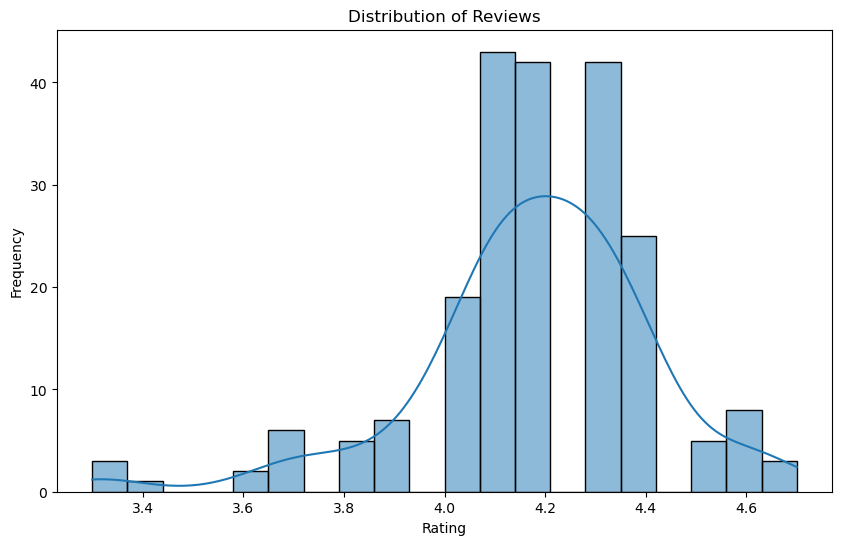

In [4]:
# Creating a histogram of reviews distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Reviews", bins=20, kde=True)
plt.title("Distribution of Reviews")
plt.xlabel("Rating")
plt.ylabel("Frequency")

#saving image
plt.savefig("reviews_distribution.png")
plt.show()

In [5]:
# Average rating
average_rating = df["Reviews"].mean()
print(f"The average rating of mobile phones is: {average_rating:.2f}")

print("\n")

# Row with the highest rating
highest_rating_row = df[df["Reviews"] == df["Reviews"].max()]

# Row with the lowest rating
lowest_rating_row = df[df["Reviews"] == df["Reviews"].min()]

print(f"Mobile phone with the highest rating:\n{highest_rating_row}\n")

print(f"Mobile phone with the lowest rating:\n{lowest_rating_row}")



The average rating of mobile phones is: 4.18


Mobile phone with the highest rating:
     Unnamed: 0                                     Product Name  \
8             8  APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)   
10           10      APPLE iPhone 11 Pro Max (Space Grey, 64 GB)   
114         114                      REDMI A2 (Sea Green, 64 GB)   

     Current Price        MRP  Discount %age  Reviews  Number Rate & Review  \
8          95699.0  ₹1,09,900           12.0      4.7                  1101   
10         95699.0  ₹1,17,100           18.0      4.7                  1101   
114         6990.0     ₹9,999           30.0      4.7                  1101   

                                           Description  
8    64 GB ROM16.51 cm (6.5 inch) Super Retina XDR ...  
10   64 GB ROM16.51 cm (6.5 inch) Super Retina XDR ...  
114  2 GB RAM | 64 GB ROM16.56 cm (6.52 inch) Displ...  

Mobile phone with the lowest rating:
     Unnamed: 0                              Product Name  

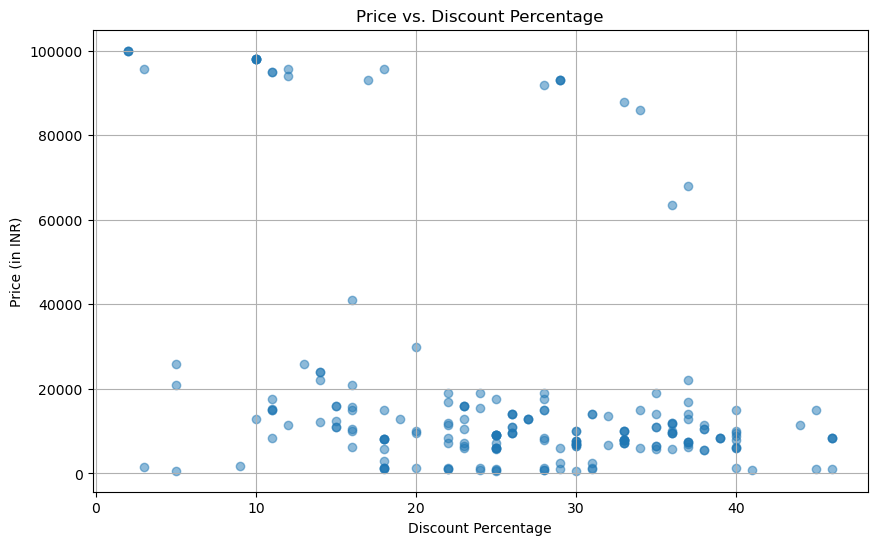

In [7]:
#Plot price against discount percentage to visualize how discounts affect prices.
# Scatter plot of Price vs. Discount Percentage
plt.figure(figsize=(10, 6))
plt.scatter(df["Discount %age"], df["Current Price"], alpha=0.5)
plt.xlabel("Discount Percentage")
plt.ylabel("Price (in INR)")
plt.title("Price vs. Discount Percentage")
plt.grid(True)

# Save the plot
plt.savefig("price_vs_discount.png")

plt.show()


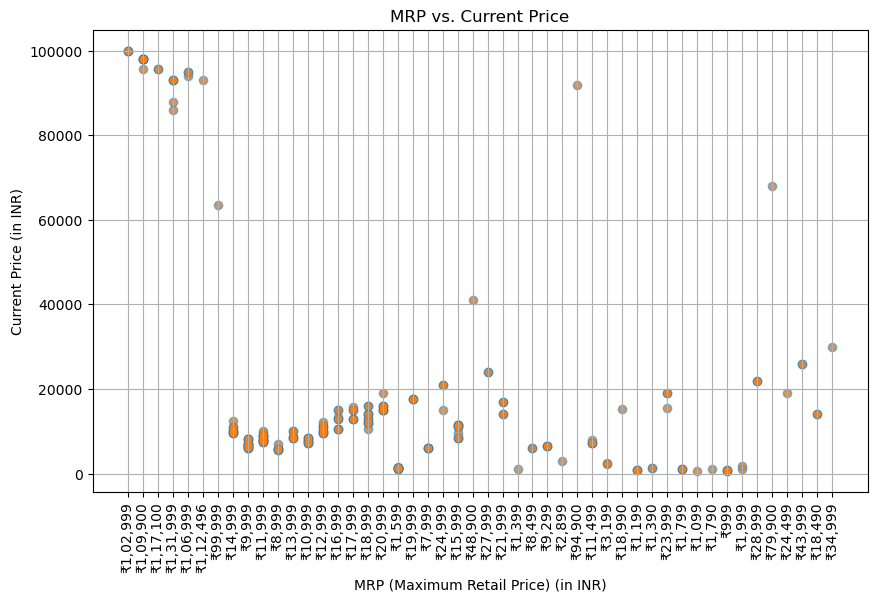

In [6]:
# Scatter plot of MRP vs. Current Price
plt.figure(figsize=(10, 6))
plt.scatter(df["MRP"], df["Current Price"], alpha=0.5)
plt.xlabel("MRP (Maximum Retail Price) (in INR)")
plt.ylabel("Current Price (in INR)")
plt.title("MRP vs. Current Price")
plt.grid(True)
plt.scatter(df["MRP"], df["Current Price"], alpha=0.5, s=20)
plt.xticks(rotation=90)
plt.savefig("MRP vs. Current Price.png")

plt.show()

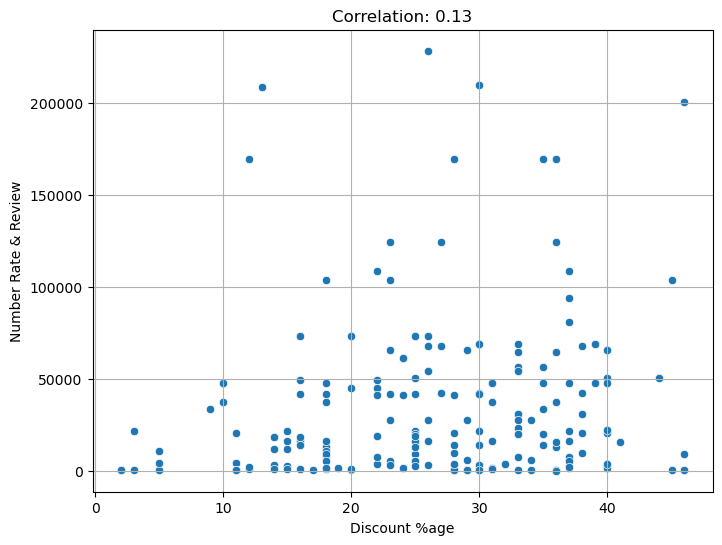

There is a positive correlation between discount percentage and the number of reviews.


In [8]:
# Correlation coefficient
correlation_coefficient = df["Discount %age"].corr(df["Number Rate & Review"])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Discount %age", y="Number Rate & Review")
plt.title(f"Correlation: {correlation_coefficient:.2f}")
plt.xlabel("Discount %age")
plt.ylabel("Number Rate & Review")
plt.grid(True)
plt.savefig("correlation coeff.png")

plt.show()

# Interpretation
if correlation_coefficient > 0:
    print("There is a positive correlation between discount percentage and the number of reviews.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between discount percentage and the number of reviews.")
else:
    print("There is no significant correlation between discount percentage and the number of reviews.")

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_20968\1381020394.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Brand'] = df['Product Name'].str.split(' ', 1).str[0]


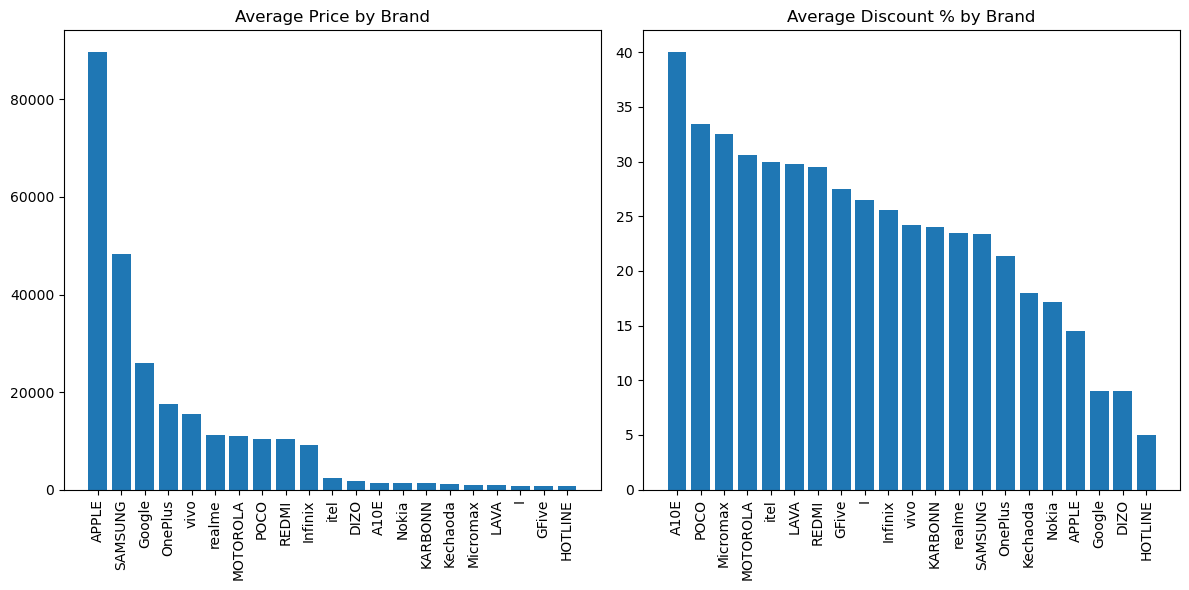

In [2]:
# Brand from the 'Product Name' column
df['Brand'] = df['Product Name'].str.split(' ', 1).str[0]

# Grouping by brand and average price and discount percentage
brand_stats = df.groupby('Brand').agg({'Current Price': 'mean', 'Discount %age': 'mean', 'Brand': 'count'})
brand_stats = brand_stats.rename(columns={'Brand': 'Count'})

# Sorting
sorted_by_price = brand_stats.sort_values(by='Current Price', ascending=False)
sorted_by_discount = brand_stats.sort_values(by='Discount %age', ascending=False)

# Bar plots to compare brands based on price and discount
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(sorted_by_price.index, sorted_by_price['Current Price'])
plt.title('Average Price by Brand')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(sorted_by_discount.index, sorted_by_discount['Discount %age'])
plt.title('Average Discount % by Brand')
plt.xticks(rotation=90)
plt.savefig("brand analysis.png")

plt.tight_layout()
plt.show()
